# Housing Price Case Study

In [55]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
from math import sqrt
import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 3 Predictive Modelling\Live Class Data Sets")

Background: The data has 506 cases where each case is a location in Boston. The “median housing price” is a target variable. The data has many other variables related to environment,education,,crime etc.which can influence the housing prices in the specific location
The objective is to identify significant factors affecting housing prices.

In [7]:
# Import Data
boston = pd.read_csv("Housing Prices.csv")
print("✅ Dataset Loaded Successfully")
print(boston.info())
print(boston.describe())

✅ Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.28463

In [8]:
print(boston.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
5   5.

Correlation Heat Map

Text(0.5, 1.0, 'Correlation Heatmap')

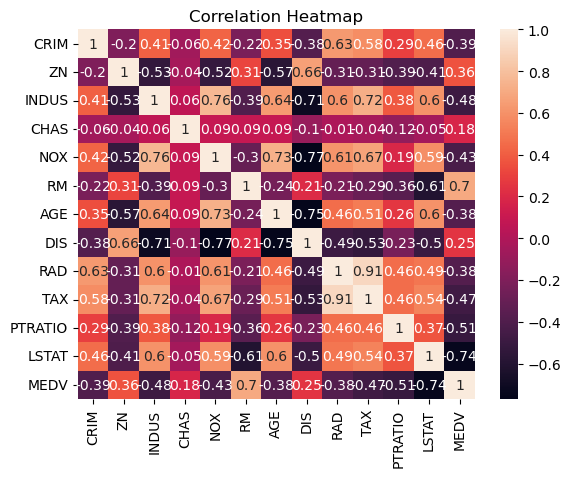

In [9]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.title("Correlation Heatmap")

Check for multicollinearity using vif


In [10]:
y, X = patsy.dmatrices('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT', data=boston, return_type="dataframe")

In [11]:
vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
vif

Intercept    535.526619
CRIM           1.767486
ZN             2.298459
INDUS          3.987181
CHAS           1.071168
NOX            4.369093
RM             1.912532
AGE            3.088232
DIS            3.954037
RAD            7.445301
TAX            9.002158
PTRATIO        1.797060
LSTAT          2.870777
dtype: float64

Output: Tax has high VIF and thus will be dropped from the model

In [19]:
# Remove the variable with the highest VIF
X = X.drop(columns=['TAX'])

In [25]:
y2, X2 = patsy.dmatrices('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+PTRATIO+LSTAT', data=boston, return_type="dataframe")

vif = pd.Series([variance_inflation_factor(X2.values, i)for i in range(X2.shape[1])],index=X2.columns)
print("Updated VIF:\n",vif)

Updated VIF:
 Intercept    529.480235
CRIM           1.767349
ZN             2.184172
INDUS          3.217951
CHAS           1.055023
NOX            4.343300
RM             1.902642
AGE            3.085756
DIS            3.952445
RAD            2.772208
PTRATIO        1.787049
LSTAT          2.870408
dtype: float64


In [26]:
boston_train, boston_test = train_test_split(boston, test_size=0.2, random_state=42)

In [35]:
print("Train Set Info:\n ", boston_train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  MEDV     404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB
Train Set Info:
  None


In [34]:
print("Test Set Info:\n ", boston_test.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 173 to 75
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  LSTAT    102 non-null    float64
 12  MEDV     102 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 11.2 KB
Test Set Info:
  None


Running Linear Regression model using OLS function from statsmodels library

In [32]:
hp_model = smf.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+PTRATIO+LSTAT',data=boston_train).fit()

In [33]:
# Display Model Summary
print(hp_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     98.99
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          7.75e-106
Time:                        10:02:15   Log-Likelihood:                -1206.6
No. Observations:                 404   AIC:                             2437.
Df Residuals:                     392   BIC:                             2485.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2203      5.555      6.340      0.0

Output: From the model summary, it can be seen that the variables ZN, INDUS,RAD and AGE are insignificant(since p value > 0.05), so we remove them from the model and run the model again.

In [36]:
hp_model = smf.ols('MEDV~CRIM+CHAS+NOX+RM+DIS+PTRATIO+LSTAT',data=boston_train).fit()
print(hp_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          6.26e-109
Time:                        10:05:55   Log-Likelihood:                -1209.4
No. Observations:                 404   AIC:                             2435.
Df Residuals:                     396   BIC:                             2467.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.8452      5.073      6.278      0.0

Plot of Residuals vs Predicted values

Text(0.5, 1.0, 'Res vs Pred Scatter Plot')

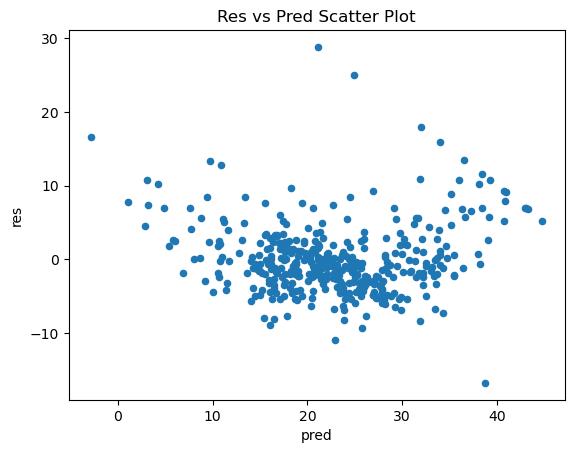

In [41]:
boston_train['pred'] = hp_model.predict(boston_train)
boston_train['res']=hp_model.resid
boston_train.plot.scatter(x='pred', y='res')
plt.title("Res vs Pred Scatter Plot")

It is observed that residuals are randomly distributed and uncorelated with predicted values
 

Check if distribution of errors is “NORMAL”

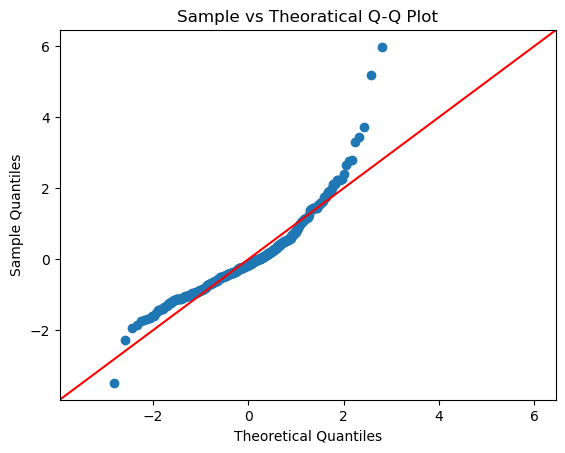

In [48]:
sm.graphics.qqplot(boston_train.res, line='45', fit=True)
plt.title("Sample vs Theoratical Q-Q Plot")
plt.show()


In [40]:
sp.stats.shapiro(boston_train.res)

ShapiroResult(statistic=0.9116813277256135, pvalue=1.2914290855869096e-14)

# Model Validation: Holdout Method using RMSE

In [52]:
rmse = (np.sqrt(mean_squared_error(boston_train['MEDV'], boston_train['pred'])))
r2 = r2_score(boston_train['MEDV'], boston_train['pred'])

print('Train RMSE is {}'.format(rmse))


Train RMSE is 4.8289054761329755


In [49]:
print('R2 score is {}'.format(r2))

R2 score is 0.7315826585744916


In [53]:
y_test_predict = hp_model.predict(boston_test)
rmse = (np.sqrt(mean_squared_error(boston_test['MEDV'], y_test_predict)))
r2 = r2_score(boston_test['MEDV'], y_test_predict)

print('Test RMSE is {}'.format(rmse))

Test RMSE is 5.104988833926641


In [51]:
print('R2 score is {}'.format(r2))


R2 score is 0.6446261208488167


# K-Fold cross validation

In [56]:
X = boston.drop(labels=['MEDV','ZN', 'INDUS', 'RAD', 'AGE'], axis=1)
Y = boston['MEDV']
hp_model1 = LinearRegression()


folds = KFold(n_splits = 4, shuffle = True, random_state = 100)
scores = cross_val_score(hp_model1, X, Y, scoring='r2', cv=folds)


print("Mean 4-Fold R Squared: {}".format(np.mean(scores)))

Mean 4-Fold R Squared: 0.7017401987251726


In [58]:
cv_rmse_scores= cross_val_score(hp_model1, X, Y, cv=folds, scoring='neg_mean_squared_error')
np.sqrt(-(np.mean(cv_rmse_scores)))
print("Mean 4-Fold RMSE: {}".format(np.sqrt(-(np.mean(cv_rmse_scores)))))

Mean 4-Fold RMSE: 5.017099097638686
